<a href="https://colab.research.google.com/github/JOJUNHYUNG0818/ai/blob/%2BdeepL/lec6_alexnet_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# 학습 및 테스트용 CIFAR-10 데이터셋 로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # 0과 1로 정규화 되어야 한다.

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

170498071/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [ ]:
# Class 개수와 이미지 크기 지정
NUM_CLASSES = 10            # CIFAR-10 Dataset 은 10개의 class 를 가지고 있음
IMG_HEIGHT = 32             # CIFAR-10 Dataset 의 이미지 크기 32x32x3
IMG_WIDTH = 32

# Epoch 횟수와 batch size, learning rate, dropout ratio 지정
EPOCHS = 2                 # 학습 반복 횟수 지정  원래는 30
BATCH_SIZE = 32             # 학습에 사용할 mini-batch 크기
LEARNING_RATE = 0.0001      # Optimizer 에 사용할 learning rate
DROP_OUT_RATIO = 0.5        # AlexNet 에 사용된 Dropout 비율

In [ ]:
# One-hot encoding 형태로 label 데이터 변경
# print('ex) y_train[0]=', y_train[0])
# y_train = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
# plt.imshow( x_train[1])

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

print('ex) after one-hot conversion, y_train[0]=', y_train[0])
print('y_train.shape= ', y_train.shape, ', y_test.shape = ', y_test.shape)

ex) after one-hot conversion, y_train[0]= [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
y_train.shape=  (50000, 10) , y_test.shape =  (10000, 10)


In [ ]:
def AlexNet_cifar10():
    model = tf.keras.Sequential([
        #layer 1
        # 첫 번째 convolution layer
        # Kernel size : 3x3
        # Input channel : 3-channels
        # Output channel : 96-channels
        # Stride : 1
        # Activation : ReLU
        tf.keras.layers.Conv2D(filters=96,                              # 출력 channel 개수
                              kernel_size=(3, 3),                       # Convolution kernel size
                              strides=1,                                # stride
                              padding='same',                           # zero-padding 사용여부 'same' : 사용 / 'valid' : 미사용
                              activation=tf.keras.activations.relu,     # 활성함수 지정(ReLU)
                              input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),  # 입력 영상 사이즈 지정(첫번째 layer에만 지정)
        # Overlapped Pooling
        # Window size : 3x3
        # Stride : 2
        tf.keras.layers.MaxPool2D(pool_size=(3, 3),                     # Pooling window 크기 (3x3)
                                 strides=2,                             # stride 2
                                 padding='same'),                       # zero-padding 사용여부
        # Batch Normalization
        tf.keras.layers.BatchNormalization(),                           # Batch normalization

        #layer 2
        # 두 번째 convolution layer
        # Kernel size : 3x3
        # Input channel : 96-channels
        # Output channel : 256-channels
        # Stride : 1
        # Activation : ReLU
        tf.keras.layers.Conv2D(filters=256,                             # 출력 channel 개수
                              kernel_size=(3, 3),                       # Convolution kernel size
                              strides=1,                                # stride
                              padding='same',                           # zero-padding 사용여부 'same' : 사용 / 'valid' : 미사용
                              activation=tf.keras.activations.relu),    # 활성함수 지정(ReLU)
        # Overlapped Pooling
        # Window size : 3x3
        # Stride : 2
        tf.keras.layers.MaxPool2D(pool_size=(3, 3),                     # Pooling window 크기 (3x3)
                                 strides=2,                             # stride 2
                                 padding='same'),                       # zero-padding 사용여부
        # Batch Normalization
        tf.keras.layers.BatchNormalization(),                           # Batch normalization

        #layer 3
        # 세 번째 convolution layer
        # Kernel size : 3x3
        # Input channel : 256-channels
        # Output channel : 384-channels
        # Stride : 1
        # Activation : ReLU
        tf.keras.layers.Conv2D(filters=384,                             # 출력 channel 개수
                              kernel_size=(3, 3),                       # Convolution kernel size
                              strides=1,                                # stride
                              padding='same',                           # zero-padding 사용여부 'same' : 사용 / 'valid' : 미사용
                              activation=tf.keras.activations.relu),    # 활성함수 지정(ReLU)

        #layer 4
        # 네 번째 convolution layer
        # Kernel size : 3x3
        # Input channel : 384-channels
        # Output channel : 384-channels
        # Stride : 1
        # Activation : ReLU
        tf.keras.layers.Conv2D(filters=384,                             # 출력 channel 개수
                              kernel_size=(3, 3),                       # Convolution kernel size
                              strides=1,                                # stride
                              padding='same',                           # zero-padding 사용여부 'same' : 사용 / 'valid' : 미사용
                              activation=tf.keras.activations.relu),    # 활성함수 지정(ReLU)

        #layer 5
        # 다섯 번째 convolution layer
        # Kernel size : 3x3
        # Input channel : 384-channels
        # Output channel : 256-channels
        # Stride : 1
        # Activation : ReLU
        tf.keras.layers.Conv2D(filters=256,                             # 출력 channel 개수
                              kernel_size=(3, 3),                       # Convolution kernel size
                              strides=1,                                # stride
                              padding='same',                           # zero-padding 사용여부 'same' : 사용 / 'valid' : 미사용
                              activation=tf.keras.activations.relu),    # 활성함수 지정(ReLU)
        # Overlapped Pooling
        # Window size : 3x3
        # Stride : 2
        tf.keras.layers.MaxPool2D(pool_size=(3, 3),                     # Pooling window 크기 (3x3)
                                 strides=2,                             # stride 2
                                 padding='same'),                       # zero-padding 사용여부
        # Batch Normalization
        tf.keras.layers.BatchNormalization(),                           # Batch normalization

        #layer 6
        # Flatten() : (Batch, Height, Width, Channel) -> (Batch, Height*Width*Channel)
        tf.keras.layers.Flatten(),
        # Dense Layer
        # Input Units : Height*Width*Channel
        # Output Units : 4096
        # Activation : ReLU
        tf.keras.layers.Dense(units=4096,                               # Dense layer 출력 개수
                             activation=tf.keras.activations.relu),     # 활성함수 지정(ReLU)
        tf.keras.layers.Dropout(rate=DROP_OUT_RATIO),                   # Dropout

        #layer 7
        # Dense Layer
        # Input Units : 4096
        # Output Units : 4096
        # Activation : ReLU
        tf.keras.layers.Dense(units=4096,                               # Dense layer 출력 개수
                             activation=tf.keras.activations.relu),     # 활성함수 지정(ReLU)
        # Dropout
        tf.keras.layers.Dropout(rate=DROP_OUT_RATIO),                   # Dropout

        #layer 8
        # Dense Layer
        # Input Units : 4096
        # Output Units : NUM_CLASSES(CIFAR-10 : 10)
        # Activation : Softmax
        tf.keras.layers.Dense(units=NUM_CLASSES,                        # Dense layer 출력 개수
                             activation=tf.keras.activations.softmax)   # 활성함수 지정(softmax)
    ])

    return model                # Keras Sequential Model 로 생성한 AlexNet 리턴

In [ ]:
# AlexNet 모델 생성
model = AlexNet_cifar10()

# 학습에 사용할 Adam optimizer 및 loss function 생성
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
losses = tf.keras.losses.CategoricalCrossentropy()

# 모델 컴파일(optimizer, loss 지정)
model.compile(optimizer=optimizer,
              loss=losses,
              metrics=['acc'])

In [ ]:
# 모델 summary 출력
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 96)        2688      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 96)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 96)        384       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 256)       221440    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 256)         0         
 g2D)                                                            
                                                        

In [ ]:
# 학습 수행
history = model.fit(x_train, y_train,          # 학습용 image(x_train)과 label(y_train)
                   batch_size=BATCH_SIZE,      # batch size 입력
                   epochs=EPOCHS,              # epoch 횟수 입력
                   validation_split=0.2,       # 매 epoch 학습 종료 시 validation에 사용할 데이터 비율 설정(20%)
                   shuffle=True)

Epoch 1/2
1250/1250 [==============================] - 40s 23ms/step - loss: 1.4446 - acc: 0.4977 - val_loss: 1.0787 - val_acc: 0.6148
Epoch 2/2
1250/1250 [==============================] - 27s 22ms/step - loss: 0.9483 - acc: 0.6690 - val_loss: 0.8499 - val_acc: 0.7037


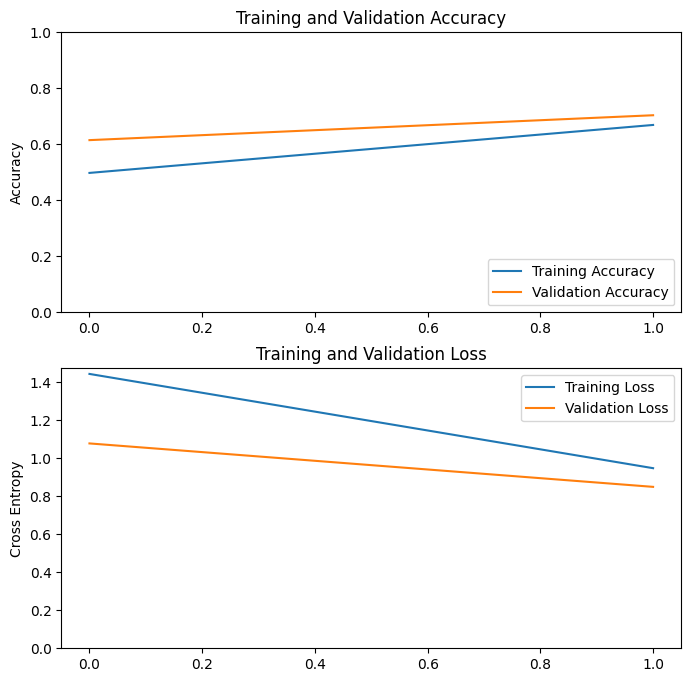

In [ ]:
# Training accuracy 및 validation accuracy
acc = history.history['acc']
val_acc = history.history['val_acc']

# Training loss 및 validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

# matplotlib 를 이용하여 accuracy 및 loss 출력
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Test 데이터를 이용한 학습 모델 검증
# model.evaluate() 를 통해 모델 검증
test_loss, test_acc = model.evaluate(x_test, y_test,
          batch_size=1, verbose=1)
print('Test Loss : {:.4f}, Test Accuracy : {:.2f}%'.format(test_loss, 100.*test_acc))

10000/10000 [==============================] - 43s 4ms/step - loss: 0.8652 - acc: 0.6953
Test Loss : 0.8652, Test Accuracy : 69.53%
